In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [116]:
car_df = pd.read_csv('./data/cars.csv')

In [117]:
brand_df = pd.read_csv('./data/brand.csv')

In [118]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [119]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


#### 1. cars.csv와 brand.csv의 데이터 합치기

[힌트] cars.csv의 title 변수로부터 브랜드 데이터를 추출할 수 있습니다.



결측치 처리하기
[힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거합니다.

Scaler 활용해보기
기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)

In [120]:
# 두 데이터 프레임의 title 값 맞추기 (inner join 할 수 있도록)
car_df['title_prefix'] = car_df['title'].str[:5].str.lower()

In [121]:
# car_df['title_prefix']와 brand_df['title']을 기준으로 **inner join**을 하고 싶다

df = car_df.merge(brand_df, left_on='title_prefix', right_on='title',  how='inner')

In [122]:
df

,title_x,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,title_prefix,title_y,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,skoda,Czech Republic
1,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,NaN,volvo,volvo,Sweden
2,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,skoda,Czech Republic
3,SKODA FABIA,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full,skoda,skoda,Czech Republic
4,MAZDA MAZDA2,1490,135800,2008,3.0,Petrol,Hatchback,1.3L,Manual,5.0,5.0,Euro 4,NaN,mazda,mazda,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,HONDA CIVIC,2490,124000,2009,NaN,Petrol,Hatchback,1.8L,Manual,3.0,5.0,Euro 4,NaN,honda,honda,Japan
295,MAZDA MAZDA3,2295,63000,2008,NaN,Petrol,Saloon,1.6L,Manual,4.0,5.0,Euro 4,NaN,mazda,mazda,Japan
296,ROVER 800,3975,34000,1995,NaN,Petrol,Saloon,2.7L,Automatic,4.0,NaN,NaN,NaN,rover,rover,United Kingdom
297,HONDA PRELUDE,2475,156097,1998,2.0,Petrol,Coupe,2.2L,Automatic,2.0,4.0,Euro 2,Full,honda,honda,Japan


In [123]:
# 조인 후 필요 없는 컬럼 제거 
df = df.drop(columns=['title_prefix'])  # 또는 drop columns=['title_y'] 등


In [124]:
# title_x 는 title으로, title_y는 brand로 이름 바꾸기
df = df.rename(columns={'title_x': 'title', 'title_y': 'brand'})

#### 카테고리형 변수를 숫자 형태로 변환하기
[힌트] Engine, Emission Class 변수에 주목하세요!

In [125]:
# 카테고리형 변수를 숫자 형태로 변환하기
# [힌트] Engine, Emission Class 변수에 주목하세요!
df.info()

# Engine: '1.4L' → '1.4' (숫자로 변환 가능하게)

# Emission Class: 'Euro 6' → '6' (등급 숫자만 추출)

# 🎯 왜 이렇게 하라고 했을까?
# 머신러닝에 쓰려면 문자열보다는 숫자 형태로 변환해주는 게 더 유리하고,
# 'L', 'Euro' 같은 단위나 접두어는 정보로서 의미가 없기 때문이에요.

df['Engine'] = df['Engine'].str.replace('L', '', regex=False).astype(float)
#df['Emission Class'] = df['Emission Class'].str.replace('Euro ', '', regex=False).astype(int)
# -> ValueError: cannot convert float NaN to integer 오류가 남
# 문자열을 먼저 정리
df['Emission Class'] = df['Emission Class'].str.replace('Euro ', '', regex=False)
# 최빈값으로 채우기
mode_value = df['Emission Class'].mode()[0]
df['Emission Class'] = df['Emission Class'].fillna(mode_value).astype(int)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              299 non-null    object 
 1   Price              299 non-null    int64  
 2   Mileage(miles)     299 non-null    int64  
 3   Registration_Year  299 non-null    int64  
 4   Previous Owners    197 non-null    float64
 5   Fuel type          299 non-null    object 
 6   Body type          299 non-null    object 
 7   Engine             296 non-null    object 
 8   Gearbox            299 non-null    object 
 9   Doors              296 non-null    float64
 10  Seats              295 non-null    float64
 11  Emission Class     288 non-null    object 
 12  Service history    35 non-null     object 
 13  brand              299 non-null    object 
 14  country            299 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 35.2+ KB


In [126]:
df['Engine']

0      1.4
1      2.3
2      1.4
3      1.9
4      1.3
      ... 
294    1.8
295    1.6
296    2.7
297    2.2
298    2.2
Name: Engine, Length: 299, dtype: float64

In [127]:
df['Emission Class']

0      6
1      4
2      6
3      4
4      4
      ..
294    4
295    4
296    4
297    2
298    4
Name: Emission Class, Length: 299, dtype: int32

#### 결측치, 중복치 처리하기

[힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거합니다.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              299 non-null    object 
 1   Price              299 non-null    int64  
 2   Mileage(miles)     299 non-null    int64  
 3   Registration_Year  299 non-null    int64  
 4   Previous Owners    197 non-null    float64
 5   Fuel type          299 non-null    object 
 6   Body type          299 non-null    object 
 7   Engine             296 non-null    float64
 8   Gearbox            299 non-null    object 
 9   Doors              296 non-null    float64
 10  Seats              295 non-null    float64
 11  Emission Class     299 non-null    int32  
 12  Service history    35 non-null     object 
 13  brand              299 non-null    object 
 14  country            299 non-null    object 
dtypes: float64(4), int32(1), int64(3), object(7)
memory usage: 34.0+ KB


In [129]:
df['Service history'] = df['Service history'].fillna('Unknown')

In [77]:
df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
1,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3,Automatic,5.0,NaN,4,Unknown,volvo,Sweden
2,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
3,SKODA FABIA,1990,150000,2007,2.0,Diesel,Hatchback,1.9,Manual,5.0,5.0,4,Full,skoda,Czech Republic
4,MAZDA MAZDA2,1490,135800,2008,3.0,Petrol,Hatchback,1.3,Manual,5.0,5.0,4,Unknown,mazda,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,HONDA CIVIC,2490,124000,2009,NaN,Petrol,Hatchback,1.8,Manual,3.0,5.0,4,Unknown,honda,Japan
295,MAZDA MAZDA3,2295,63000,2008,NaN,Petrol,Saloon,1.6,Manual,4.0,5.0,4,Unknown,mazda,Japan
296,ROVER 800,3975,34000,1995,NaN,Petrol,Saloon,2.7,Automatic,4.0,NaN,4,Unknown,rover,United Kingdom
297,HONDA PRELUDE,2475,156097,1998,2.0,Petrol,Coupe,2.2,Automatic,2.0,4.0,2,Full,honda,Japan


In [130]:
# 결측치 변수가 2개 이상인 데이터는 제거하기
df = df[df.isnull().sum(axis=1) < 2]


In [131]:
df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
2,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
3,SKODA FABIA,1990,150000,2007,2.0,Diesel,Hatchback,1.9,Manual,5.0,5.0,4,Full,skoda,Czech Republic
4,MAZDA MAZDA2,1490,135800,2008,3.0,Petrol,Hatchback,1.3,Manual,5.0,5.0,4,Unknown,mazda,Japan
5,HONDA ACCORD,1400,155085,2004,2.0,Petrol,Estate,2.4,Manual,5.0,5.0,4,Full,honda,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,HONDA ACCORD,1795,107795,2007,NaN,Diesel,Saloon,2.2,Manual,4.0,5.0,4,Unknown,honda,Japan
294,HONDA CIVIC,2490,124000,2009,NaN,Petrol,Hatchback,1.8,Manual,3.0,5.0,4,Unknown,honda,Japan
295,MAZDA MAZDA3,2295,63000,2008,NaN,Petrol,Saloon,1.6,Manual,4.0,5.0,4,Unknown,mazda,Japan
297,HONDA PRELUDE,2475,156097,1998,2.0,Petrol,Coupe,2.2,Automatic,2.0,4.0,2,Full,honda,Japan


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 298
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              293 non-null    object 
 1   Price              293 non-null    int64  
 2   Mileage(miles)     293 non-null    int64  
 3   Registration_Year  293 non-null    int64  
 4   Previous Owners    196 non-null    float64
 5   Fuel type          293 non-null    object 
 6   Body type          293 non-null    object 
 7   Engine             293 non-null    float64
 8   Gearbox            293 non-null    object 
 9   Doors              292 non-null    float64
 10  Seats              292 non-null    float64
 11  Emission Class     293 non-null    int32  
 12  Service history    293 non-null    object 
 13  brand              293 non-null    object 
 14  country            293 non-null    object 
dtypes: float64(4), int32(1), int64(3), object(7)
memory usage: 35.5+ KB


In [134]:
df['Previous Owners'] = df['Previous Owners'].fillna(df['Previous Owners'].mean())

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 298
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              293 non-null    object 
 1   Price              293 non-null    int64  
 2   Mileage(miles)     293 non-null    int64  
 3   Registration_Year  293 non-null    int64  
 4   Previous Owners    293 non-null    float64
 5   Fuel type          293 non-null    object 
 6   Body type          293 non-null    object 
 7   Engine             293 non-null    float64
 8   Gearbox            293 non-null    object 
 9   Doors              292 non-null    float64
 10  Seats              292 non-null    float64
 11  Emission Class     293 non-null    int32  
 12  Service history    293 non-null    object 
 13  brand              293 non-null    object 
 14  country            293 non-null    object 
dtypes: float64(4), int32(1), int64(3), object(7)
memory usage: 35.5+ KB


In [136]:
# 중복치 찾기
df[df.duplicated()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
2,SKODA FABIA,6900,70189,2016,3.000000,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
22,HONDA CIVIC,9198,78691,2018,2.959184,Diesel,Hatchback,1.6,Manual,5.0,5.0,6,Unknown,honda,Japan
30,HONDA CIVIC,9198,78691,2018,2.959184,Diesel,Hatchback,1.6,Manual,5.0,5.0,6,Unknown,honda,Japan
33,SKODA FABIA,6900,70189,2016,3.000000,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
34,SKODA FABIA,6900,70189,2016,3.000000,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
41,HONDA CIVIC,9198,78691,2018,2.959184,Diesel,Hatchback,1.6,Manual,5.0,5.0,6,Unknown,honda,Japan
42,HONDA CIVIC,9198,78691,2018,2.959184,Diesel,Hatchback,1.6,Manual,5.0,5.0,6,Unknown,honda,Japan
50,SKODA FABIA,6900,70189,2016,3.000000,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
53,HONDA CIVIC,9198,78691,2018,2.959184,Diesel,Hatchback,1.6,Manual,5.0,5.0,6,Unknown,honda,Japan
56,SKODA FABIA,6900,70189,2016,3.000000,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic


In [137]:
# 중복값 제거
df.drop_duplicates(inplace=True)

In [ ]:
df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
3,SKODA FABIA,1990,150000,2007,2.0,Diesel,Hatchback,1.9,Manual,5.0,5.0,4,Full,skoda,Czech Republic
4,MAZDA MAZDA2,1490,135800,2008,3.0,Petrol,Hatchback,1.3,Manual,5.0,5.0,4,Unknown,mazda,Japan
5,HONDA ACCORD,1400,155085,2004,2.0,Petrol,Estate,2.4,Manual,5.0,5.0,4,Full,honda,Japan
6,HONDA CIVIC,1900,132000,2008,6.0,Petrol,Hatchback,1.8,Automatic,5.0,5.0,4,Unknown,honda,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,HONDA ACCORD,1795,107795,2007,NaN,Diesel,Saloon,2.2,Manual,4.0,5.0,4,Unknown,honda,Japan
294,HONDA CIVIC,2490,124000,2009,NaN,Petrol,Hatchback,1.8,Manual,3.0,5.0,4,Unknown,honda,Japan
295,MAZDA MAZDA3,2295,63000,2008,NaN,Petrol,Saloon,1.6,Manual,4.0,5.0,4,Unknown,mazda,Japan
297,HONDA PRELUDE,2475,156097,1998,2.0,Petrol,Coupe,2.2,Automatic,2.0,4.0,2,Full,honda,Japan


#### Scaler 활용해보기

c:\Users\J\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\J\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\J\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\J\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

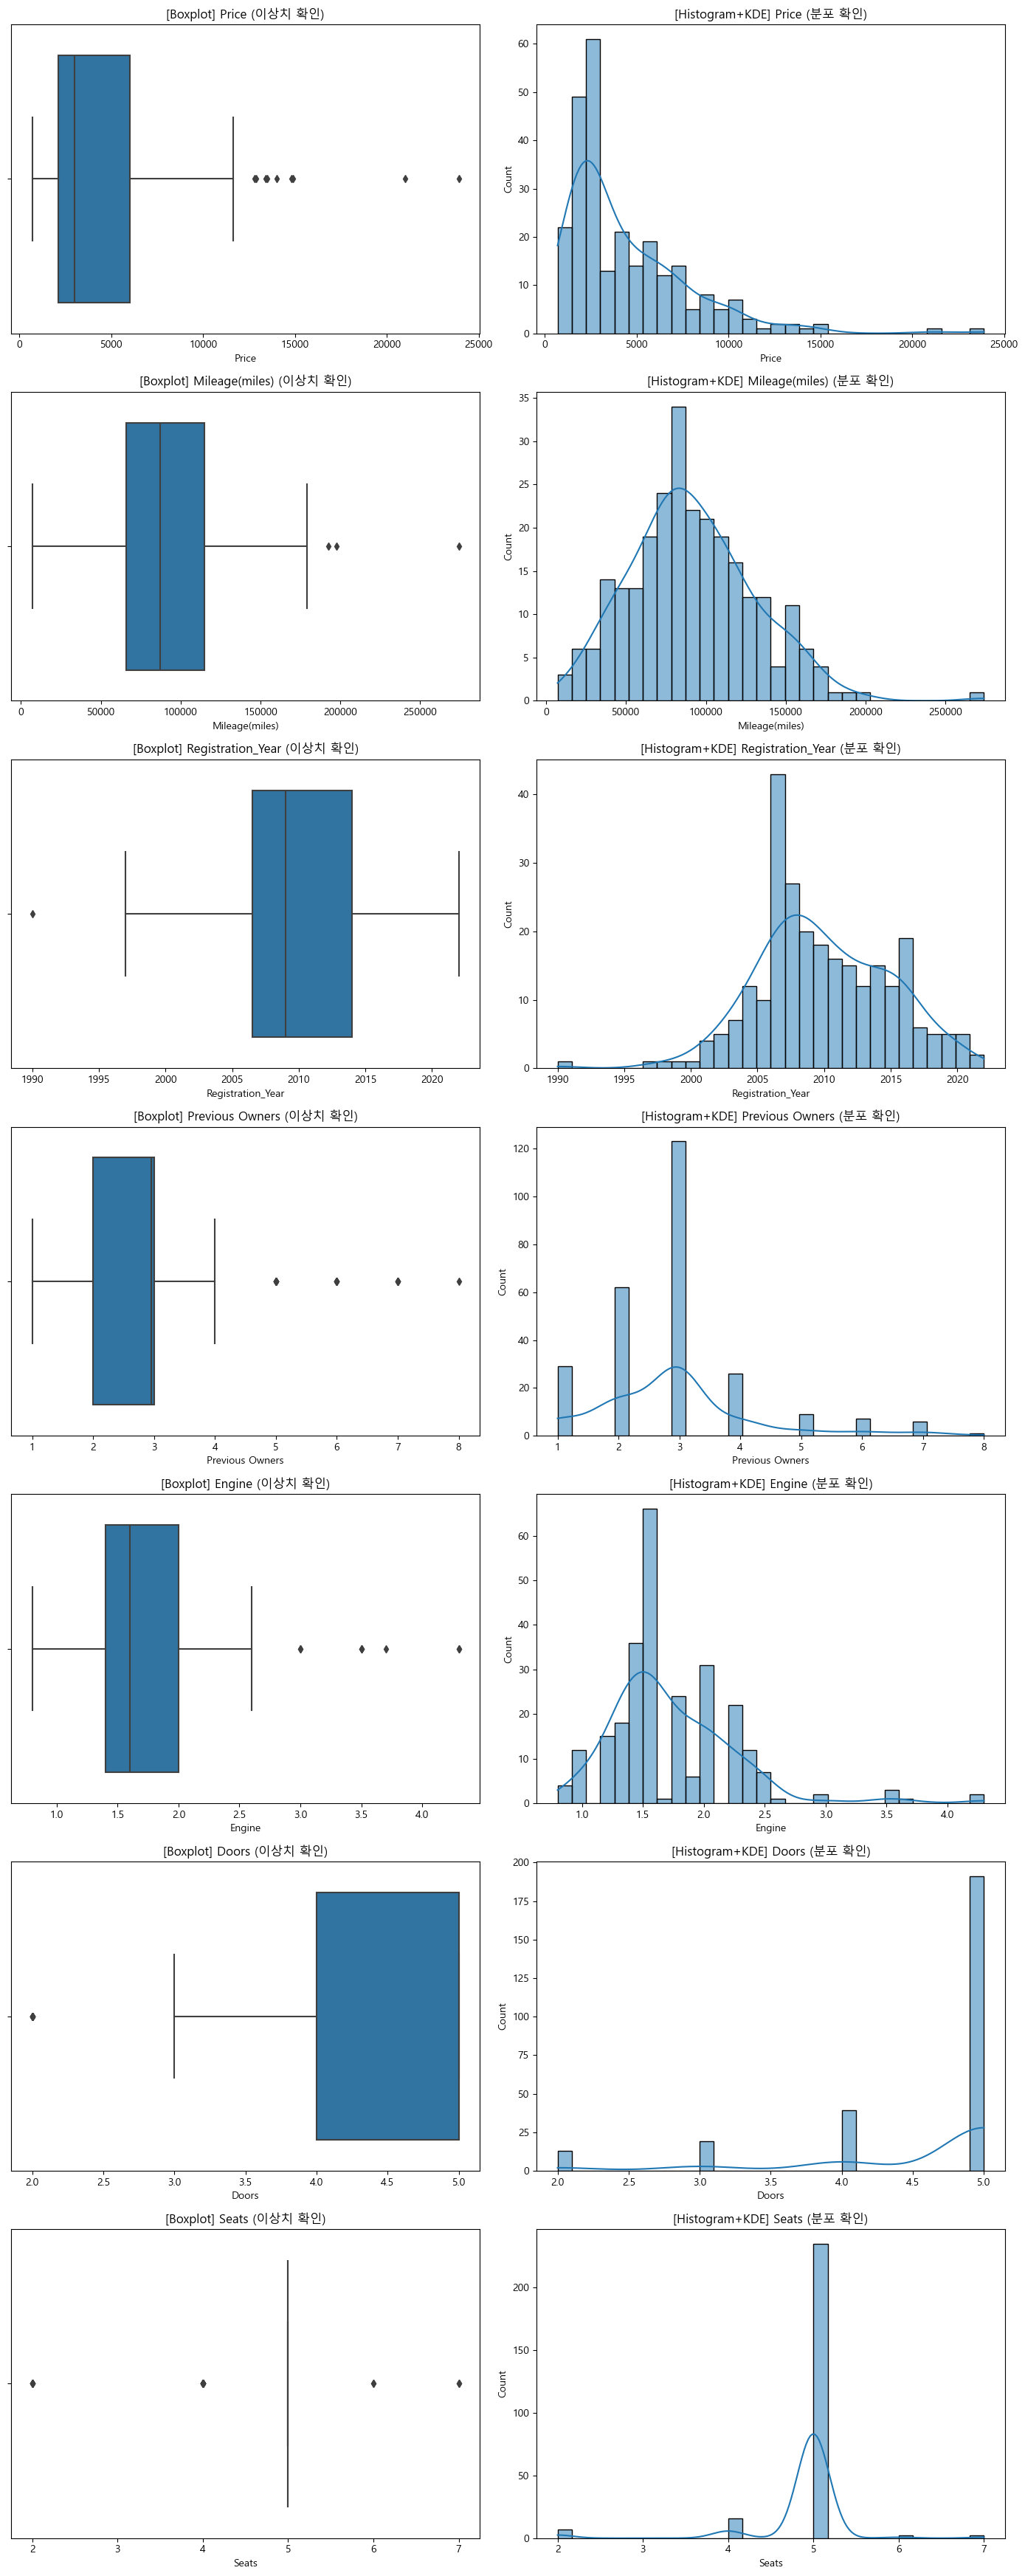

In [138]:
## 어떤 스케일러가 좋을까?
# ✅ 변수 분포 + 이상치 시각화 코드

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지

# 수치형 변수만 추출
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# 시각화
plt.figure(figsize=(14, len(numeric_cols) * 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 2, i * 2 + 1)
    sns.boxplot(data=df_numeric, x=col)
    plt.title(f"[Boxplot] {col} (이상치 확인)")
    
    plt.subplot(len(numeric_cols), 2, i * 2 + 2)
    sns.histplot(data=df_numeric, x=col, bins=30, kde=True)
    plt.title(f"[Histogram+KDE] {col} (분포 확인)")

plt.tight_layout()
plt.show()



**이상치(outlier)**가 있는 변수들이 꽤 많아요:

예: Price, Mileage(miles), Previous Owners, Doors, Seats 등

박스플롯에서 동떨어진 점들(●)이 많으면 이상치가 존재한다는 뜻이에요

**정규분포(종 모양)**에 가까운 변수는 많지 않아요

대부분 **한쪽으로 치우친 분포(skewed distribution)**를 보이고 있어요

✅ 최종 추천: RobustScaler


In [92]:
from sklearn.preprocessing import RobustScaler

# 수치형 열만 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 스케일링할 데이터 복사
X = df[numeric_cols].copy()

# 스케일링 적용
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 결과를 데이터프레임으로 변환
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)


In [93]:
X_scaled_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats
0,0.999744,-0.342327,0.933333,0.5,-0.333333,0.0,0.0
1,-0.258908,1.282887,-0.266667,0.0,0.500000,0.0,0.0
2,-0.387080,0.993728,-0.133333,0.5,-0.500000,0.0,0.0
3,-0.410151,1.386434,-0.666667,0.0,1.333333,0.0,0.0
4,-0.281979,0.916348,-0.133333,2.0,0.333333,0.0,0.0
...,...,...,...,...,...,...,...
258,-0.308895,0.423454,-0.266667,NaN,1.000000,-1.0,0.0
259,-0.130736,0.753441,0.000000,NaN,0.333333,-2.0,0.0
260,-0.180723,-0.488719,-0.133333,NaN,0.000000,-1.0,0.0
261,-0.134581,1.407042,-1.466667,0.0,1.000000,-3.0,-1.0


In [96]:
# 다른 스케일러도 써보기
from sklearn.preprocessing import StandardScaler

# 바꾸기만 하면 끝!
scaler = StandardScaler()     
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)
X_scaled_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats
0,0.718795,-0.546286,1.227426,0.096164,-0.642897,0.533211,0.207327
1,-0.727232,1.498028,-0.587263,-0.547398,0.325499,0.533211,0.207327
2,-0.874485,1.134303,-0.385631,0.096164,-0.836576,0.533211,0.207327
3,-0.900991,1.628278,-1.192159,-0.547398,1.293894,0.533211,0.207327
4,-0.753738,1.036968,-0.385631,2.026851,0.131820,0.533211,0.207327
...,...,...,...,...,...,...,...
258,-0.784661,0.416971,-0.587263,NaN,0.906536,-0.671110,0.207327
259,-0.579979,0.832053,-0.183999,NaN,0.131820,-1.875431,0.207327
260,-0.637407,-0.730428,-0.385631,NaN,-0.255538,-0.671110,0.207327
261,-0.584396,1.654200,-2.401952,-0.547398,0.906536,-3.079752,-1.544917


In [97]:
# 다른 스케일러도 써보기
from sklearn.preprocessing import MinMaxScaler

# 바꾸기만 하면 끝!
scaler = MinMaxScaler()     # 또는 RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)
X_scaled_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats
0,0.267284,0.236337,0.81250,0.285714,0.171429,1.000000,0.6
1,0.055783,0.535236,0.53125,0.142857,0.314286,1.000000,0.6
2,0.034245,0.482055,0.56250,0.285714,0.142857,1.000000,0.6
3,0.030368,0.554279,0.43750,0.142857,0.457143,1.000000,0.6
4,0.051906,0.467824,0.56250,0.714286,0.285714,1.000000,0.6
...,...,...,...,...,...,...,...
258,0.047383,0.377174,0.53125,NaN,0.400000,0.666667,0.6
259,0.077321,0.437864,0.59375,NaN,0.285714,0.333333,0.6
260,0.068921,0.209414,0.56250,NaN,0.228571,0.666667,0.6
261,0.076675,0.558069,0.25000,0.142857,0.400000,0.000000,0.4


#### 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)


In [98]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# 수치형 변수만 추출
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_cols].dropna()  # 결측치 제거

# 표준화 (RobustScaler 사용)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 누적 설명 분산 비율 확인
explained_ratio = pca.explained_variance_ratio_.cumsum()

# 몇 개의 주성분이 70%를 설명하는지 확인
n_components_70 = (explained_ratio >= 0.7).argmax() + 1
print(f"✔️ 70% 이상 설명하는 최소 주성분 개수: {n_components_70}")


✔️ 70% 이상 설명하는 최소 주성분 개수: 1


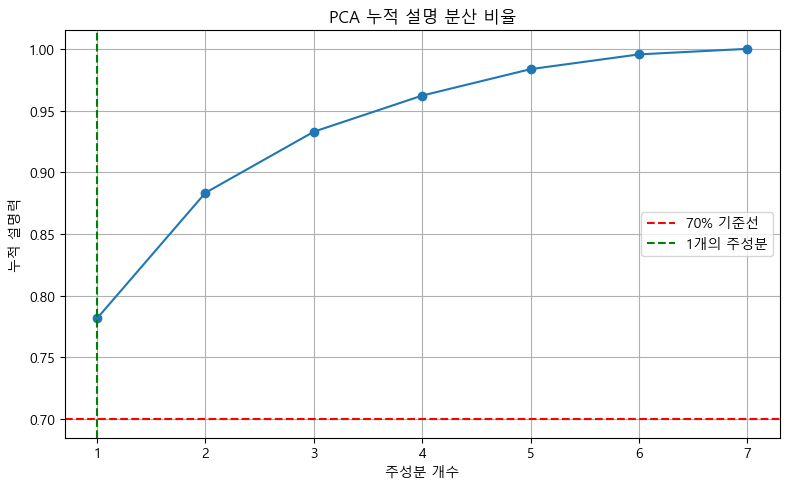

In [102]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지

# X축을 명시적으로 1부터 시작하는 range로 설정
components_range = range(1, len(explained_ratio) + 1)

plt.figure(figsize=(8, 5))
plt.plot(components_range, explained_ratio, marker='o')  # 👈 여기에 x값 직접 넣기

# 기준선 표시
plt.axhline(y=0.7, color='red', linestyle='--', label='70% 기준선')
plt.axvline(x=n_components_70, color='green', linestyle='--', label=f'{n_components_70}개의 주성분')

# 그래프 꾸미기
plt.title("PCA 누적 설명 분산 비율")
plt.xlabel("주성분 개수")
plt.ylabel("누적 설명력")
plt.xticks(components_range)  # 👈 눈금도 정수로 맞춰주면 깔끔
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [103]:
# 필요한 주성분 수만큼 다시 PCA 수행
pca_final = PCA(n_components=n_components_70)
X_reduced = pca_final.fit_transform(X_scaled)

# 결과를 DataFrame으로 정리
pca_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components_70)])


In [104]:
pca_df

,PC1
0,-1.790577
1,-1.609070
2,-1.696295
3,-1.515672
4,-1.627767
...,...
167,-1.713728
168,-1.585426
169,-1.600591
170,-1.734291


추가 과제

In [105]:
df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Unknown,skoda,Czech Republic
3,SKODA FABIA,1990,150000,2007,2.0,Diesel,Hatchback,1.9,Manual,5.0,5.0,4,Full,skoda,Czech Republic
4,MAZDA MAZDA2,1490,135800,2008,3.0,Petrol,Hatchback,1.3,Manual,5.0,5.0,4,Unknown,mazda,Japan
5,HONDA ACCORD,1400,155085,2004,2.0,Petrol,Estate,2.4,Manual,5.0,5.0,4,Full,honda,Japan
6,HONDA CIVIC,1900,132000,2008,6.0,Petrol,Hatchback,1.8,Automatic,5.0,5.0,4,Unknown,honda,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,HONDA ACCORD,1795,107795,2007,NaN,Diesel,Saloon,2.2,Manual,4.0,5.0,4,Unknown,honda,Japan
294,HONDA CIVIC,2490,124000,2009,NaN,Petrol,Hatchback,1.8,Manual,3.0,5.0,4,Unknown,honda,Japan
295,MAZDA MAZDA3,2295,63000,2008,NaN,Petrol,Saloon,1.6,Manual,4.0,5.0,4,Unknown,mazda,Japan
297,HONDA PRELUDE,2475,156097,1998,2.0,Petrol,Coupe,2.2,Automatic,2.0,4.0,2,Full,honda,Japan


In [ ]:
#국가별 총 브랜드 개수는?
df.groupby('country')['brand'].count()
#즉, 한 브랜드가 여러 번 나왔다면 중복 포함되어 집계돼요.

df.groupby('country')['brand'].nunique()
#nunique()는 고유한 값의 개수만 셉니다



country
Czech Republic    1
Germany           1
Japan             3
Romania           1
Sweden            1
United Kingdom    1
United States     1
Name: brand, dtype: int64

                      Price  Mileage(miles)  Registration_Year  \
Price              1.000000       -0.525220           0.756360   
Mileage(miles)    -0.525220        1.000000          -0.374378   
Registration_Year  0.756360       -0.374378           1.000000   
Previous Owners   -0.405582        0.287523          -0.323772   
Engine            -0.067490        0.395571          -0.310582   
Doors              0.044933       -0.017462           0.271800   
Seats             -0.148005        0.139393          -0.026891   
Emission Class     0.701985       -0.373292           0.901134   

                   Previous Owners    Engine     Doors     Seats  \
Price                    -0.405582 -0.067490  0.044933 -0.148005   
Mileage(miles)            0.287523  0.395571 -0.017462  0.139393   
Registration_Year        -0.323772 -0.310582  0.271800 -0.026891   
Previous Owners           1.000000 -0.013532 -0.019939  0.017707   
Engine                   -0.013532  1.000000 -0.266965  0.016570 

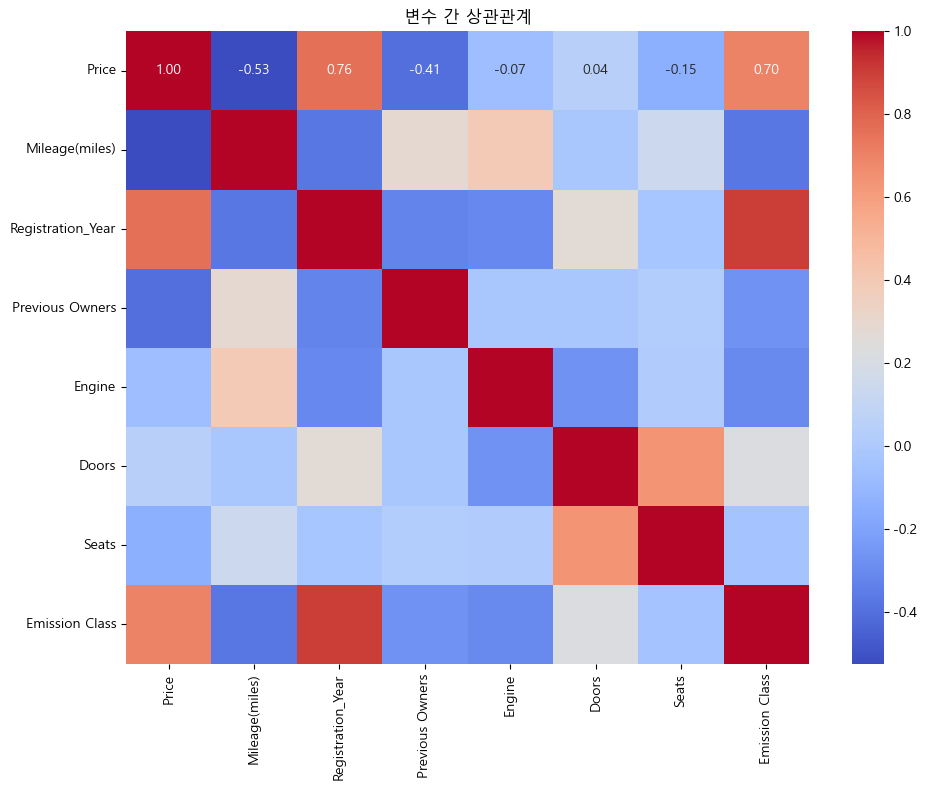

In [110]:
#상관관계가 높은 변수들이 있는지 확인해보세요.
correlation_matrix = df.corr(numeric_only=True)  # 수치형 변수만 상관관계 분석
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("변수 간 상관관계")
plt.tight_layout()
plt.show()


In [112]:
# ✅ 보너스: 상관계수가 높은 변수쌍만 뽑고 싶다면?

import numpy as np

# 상관계수 행렬
corr = df.corr(numeric_only=True)

# 상삼각 행렬만 추출하여 중복 제거
mask = np.triu(np.ones_like(corr, dtype=bool))
filtered_corr = corr.mask(mask)

# 절대값 기준으로 높은 상관관계 추출
high_corr = filtered_corr[(abs(filtered_corr) >= 0.7) & (abs(filtered_corr) < 1.0)].stack()
print(high_corr)


Registration_Year  Price                0.756360
Emission Class     Price                0.701985
                   Registration_Year    0.901134
dtype: float64


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 298
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              263 non-null    object 
 1   Price              263 non-null    int64  
 2   Mileage(miles)     263 non-null    int64  
 3   Registration_Year  263 non-null    int64  
 4   Previous Owners    174 non-null    float64
 5   Fuel type          263 non-null    object 
 6   Body type          263 non-null    object 
 7   Engine             263 non-null    float64
 8   Gearbox            263 non-null    object 
 9   Doors              262 non-null    float64
 10  Seats              262 non-null    float64
 11  Emission Class     263 non-null    int32  
 12  Service history    263 non-null    object 
 13  brand              263 non-null    object 
 14  country            263 non-null    object 
dtypes: float64(4), int32(1), int64(3), object(7)
memory usage: 31.8+ KB
